In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model

In [2]:
#df.to_csv('employeeAT.csv')
df=pd.read_csv('employeeAT.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,11,5,3,5,3,0,2,No
1,1,15634602,619,France,Female,42,2,0.0,1,1,...,80,0,10,1,3,3,2,0,2,No
2,2,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,10,4,3,9,6,7,8,No
3,3,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,23,2,4,20,4,4,8,No
4,4,15634602,619,France,Female,42,2,0.0,1,1,...,80,0,16,2,3,1,0,0,0,No
5,5,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,8,5,3,5,2,1,2,No
6,6,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,19,3,3,5,4,0,2,No
7,7,15634602,619,France,Female,42,2,0.0,1,1,...,80,3,7,4,4,6,5,0,4,No
8,8,15634602,619,France,Female,42,2,0.0,1,1,...,80,2,10,4,3,10,2,2,2,No
9,9,15634602,619,France,Female,42,2,0.0,1,1,...,80,1,8,4,3,4,3,0,2,No


In [4]:
df.tail()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
33913,33913,15699598,723,France,Female,20,4,0.0,2,1,...,80,0,1,0,4,1,0,0,0,No
33914,33914,15699598,723,France,Female,20,4,0.0,2,1,...,80,0,2,3,2,2,2,0,2,Yes
33915,33915,15699598,723,France,Female,20,4,0.0,2,1,...,80,0,1,2,3,1,0,0,0,Yes
33916,33916,15699598,723,France,Female,20,4,0.0,2,1,...,80,0,2,3,3,2,2,0,2,Yes
33917,33917,15699598,723,France,Female,20,4,0.0,2,1,...,80,0,2,3,3,2,2,2,2,No


In [5]:
from IPython.display import HTML
# you only change video ID : 'TNzDMOg_zsw' , and width and height as you want
display(HTML('<h1>Data Preprossing</h1>'))

In [6]:
df.isnull().sum()

RowNumber                   0
CustomerId                  0
CreditScore                 0
Geography                   0
Gender                      0
Age                         0
Tenure                      0
Balance                     0
NumOfProducts               0
HasCrCard                   0
IsActiveMember              0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptio

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,DailyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,33918.000000,3.391800e+04,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,...,33918.000000,33918.0,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000
mean,16958.500000,1.568990e+07,648.220178,35.874108,5.129371,77105.131612,1.530249,0.728315,0.485318,800.180406,...,2.697005,80.0,0.817295,10.577186,2.788637,2.766024,7.041600,4.372074,2.189781,4.296038
std,9791.427552,7.149021e+04,100.907575,6.279752,2.877353,62246.278760,0.553648,0.444835,0.499792,403.506133,...,1.079294,0.0,0.855803,6.209228,1.278180,0.704280,5.501863,3.623185,3.143263,3.548204
min,0.000000,1.556570e+07,359.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,102.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8479.250000,1.562780e+07,577.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,465.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,16958.500000,1.568825e+07,652.000000,35.000000,5.000000,96423.840000,2.000000,1.000000,0.000000,798.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,25437.750000,1.574948e+07,724.000000,40.000000,8.000000,128173.900000,2.000000,1.000000,1.000000,1158.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,33917.000000,1.581536e+07,850.000000,60.000000,10.000000,214346.960000,4.000000,1.000000,1.000000,1499.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33918 entries, 0 to 33917
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 33918 non-null  int64  
 1   CustomerId                33918 non-null  int64  
 2   CreditScore               33918 non-null  int64  
 3   Geography                 33918 non-null  object 
 4   Gender                    33918 non-null  object 
 5   Age                       33918 non-null  int64  
 6   Tenure                    33918 non-null  int64  
 7   Balance                   33918 non-null  float64
 8   NumOfProducts             33918 non-null  int64  
 9   HasCrCard                 33918 non-null  int64  
 10  IsActiveMember            33918 non-null  int64  
 11  BusinessTravel            33918 non-null  object 
 12  DailyRate                 33918 non-null  int64  
 13  Department                33918 non-null  object 
 14  Distan

In [9]:
df.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,DailyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
RowNumber,1.000000,0.038379,-0.018381,-0.021277,0.009657,-0.054866,-0.002858,0.038536,-0.012251,0.028797,...,-0.029700,NaN,0.033004,-0.004103,-0.017677,-0.059799,-0.035900,-0.017583,-0.001820,-0.008761
CustomerId,0.038379,1.000000,0.029998,0.000036,-0.006728,-0.007889,-0.008719,-0.074963,0.057955,-0.000083,...,-0.007419,NaN,0.000143,0.002969,-0.003493,-0.007779,-0.006773,-0.002535,0.000932,0.001609
CreditScore,-0.018381,0.029998,1.000000,-0.006238,-0.029307,0.059614,-0.020691,-0.032535,0.061691,0.000529,...,-0.010106,NaN,0.001070,-0.006884,0.006592,0.005016,0.002051,-0.002998,0.009556,-0.000285
Age,-0.021277,0.000036,-0.006238,1.000000,-0.006221,0.029885,-0.048946,-0.030472,0.004371,-0.003059,...,0.031805,NaN,-0.002459,0.582209,-0.006559,0.024552,0.249794,0.145353,0.171665,0.138984
Tenure,0.009657,-0.006728,-0.029307,-0.006221,1.000000,-0.061123,0.048125,0.045682,-0.104019,-0.004042,...,0.012414,NaN,-0.006074,-0.001465,-0.000846,-0.002856,0.004798,-0.002219,0.004607,0.001900
Balance,-0.054866,-0.007889,0.059614,0.029885,-0.061123,1.000000,-0.317673,-0.030853,0.010210,-0.005554,...,0.001093,NaN,0.000833,0.019415,0.004161,0.006257,0.002923,0.000437,0.004803,0.002219
NumOfProducts,-0.002858,-0.008719,-0.020691,-0.048946,0.048125,-0.317673,1.000000,-0.007393,-0.002817,0.001815,...,0.005495,NaN,-0.003487,-0.031576,0.007264,-0.000752,-0.011191,-0.013107,-0.013811,-0.006172
HasCrCard,0.038536,-0.074963,-0.032535,-0.030472,0.045682,-0.030853,-0.007393,1.000000,-0.023712,0.005261,...,0.015715,NaN,0.000416,-0.021042,-0.003615,0.004227,-0.008621,-0.001086,-0.003989,-0.003549
IsActiveMember,-0.012251,0.057955,0.061691,0.004371,-0.104019,0.010210,-0.002817,-0.023712,1.000000,-0.007656,...,-0.000349,NaN,-0.008374,-0.002281,0.001488,-0.003227,-0.004254,-0.008201,-0.010003,-0.004058
DailyRate,0.028797,-0.000083,0.000529,-0.003059,-0.004042,-0.005554,0.001815,0.005261,-0.007656,1.000000,...,0.035835,NaN,0.042332,0.014869,-0.015329,-0.032730,-0.032750,0.011217,-0.046573,-0.032471


In [10]:
Nunique = df.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                          1
StandardHours                   1
Attrition                       2
OverTime                        2
IsActiveMember                  2
PerformanceRating               2
HasCrCard                       2
Gender                          2
Geography                       3
BusinessTravel                  3
Department                      3
MaritalStatus                   3
NumOfProducts                   4
EnvironmentSatisfaction         4
StockOptionLevel                4
WorkLifeBalance                 4
JobSatisfaction                 4
RelationshipSatisfaction        4
JobInvolvement                  4
JobLevel                        5
Education                       5
EducationField                  6
TrainingTimesLastYear           7
JobRole                         9
NumCompaniesWorked             10
Tenure                         11
PercentSalaryHike              15
YearsSinceLastPromotion        16
YearsWithCurrManager           18
YearsInCurrent

In [11]:
display(HTML('<h1>Feature Selection</h1>'))

In [12]:
#feature selection before encoding and decoding
outcome_corr=df.corr().iloc[:,-1].values.tolist()[:-1]
outcome_corr=[x for x in outcome_corr if np.isnan(x) == False]
outcome_corr.sort(reverse=True)
meancrr=sum(outcome_corr)/len(outcome_corr)
print(meancrr)
allowedcol=[]
for i in outcome_corr:
    if i>meancrr:
        allowedcol.append(df.corr().iloc[:,-1].values.tolist()[:-1].index(i))
print(sorted(allowedcol))

0.10308624282683922
[3, 15, 17, 25, 28, 29, 30]


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_df_1 = LabelEncoder()
df['Geography'] = labelencoder_df_1.fit_transform(df['Geography'])
labelencoder_df_9 = LabelEncoder()
df['OverTime'] = labelencoder_df_9.fit_transform(df['OverTime'])
labelencoder_df_10 = LabelEncoder()
df['Attrition'] = labelencoder_df_10.fit_transform(df['Attrition'])


In [15]:
#X=df.iloc[:, np.r_[1:5,6:12,13:17,18,21,23,25:27,28:31,39]]
#y=df.iloc[:,-1]
X=df.iloc[:,np.r_[3,15,17,25,28:31]]
y=df.iloc[:,-1]

In [16]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.layers import Dense
from keras.models import Sequential
#initialize the neural net#bulid layer of neural net#initialize the neural net
#initializing the ann
model=Sequential()
#adding input layer and first hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))#ip+op/2=avg hidden layer
model.add(Dense(6, input_shape=(7500,16934), activation='relu'))
# Adding the second hidden layer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#ip+op/2=avg hidden layer
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#ip+op/2=avg hidden layer#softmax(sigmoid func apply to mor than two categorie)
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#optimizer(find best algo)#binary_,categori_
# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, epochs=30, batch_size=10)

Epoch 1/30
2544/2544 [==============================] - 8s 2ms/step - loss: 0.4487 - accuracy: 0.8527
Epoch 2/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3697 - accuracy: 0.8542
Epoch 3/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3782 - accuracy: 0.8504
Epoch 4/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3717 - accuracy: 0.8512
Epoch 5/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3682 - accuracy: 0.8541
Epoch 6/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3745 - accuracy: 0.8509
Epoch 7/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3780 - accuracy: 0.8499
Epoch 8/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3729 - accuracy: 0.8481
Epoch 9/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.3684 - accuracy: 0.8516
Epoch 10/30
2544/2544 [==============================] - 6s 2ms/step - loss: 0.360

In [19]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

array([[0.05130064],
       [0.04833317],
       [0.1321651 ],
       ...,
       [0.5113628 ],
       [0.10575908],
       [0.20085165]], dtype=float32)

In [22]:
import math
for i in range(len(y_pred)):
    if y_pred[i]<0.5:
        y_pred[i]=math.floor(y_pred[i])
    else:
        y_pred[i]= math.ceil(y_pred[i])


[[6903  351]
 [ 888  338]]


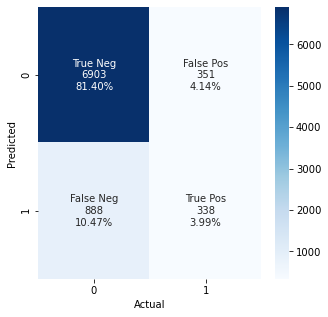

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.subplots(figsize=(5,5))
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

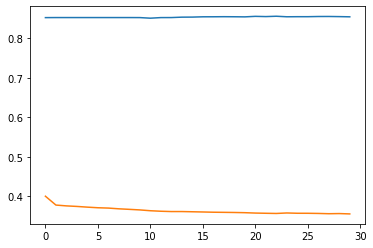

In [25]:
from matplotlib import pyplot
history_dict = history.history
history_dict.keys()
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['loss'])
pyplot.show()

In [27]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.14610849056603772


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7254
           1       0.49      0.28      0.35      1226

    accuracy                           0.85      8480
   macro avg       0.69      0.61      0.64      8480
weighted avg       0.83      0.85      0.84      8480



In [40]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
#new_prediction = model.predict(sc.transform(np.array([[10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000]])))
[a,b,c,d,e,f,g]=eval(input('Geography')),eval(input('Education')),eval(input('EnvironmentSatisfaction')),eval(input('MonthlyRate')),eval(input('OverTime')),eval(input('PercentSalaryHike')),eval(input('PerformanceRating'))
pred=model.predict([[a,b,c,d,e,f,g]])
print(pred)
if pred>0.5:
    x="leave"
else:
    x="loyal"
print(x)

Geography1
Education2
EnvironmentSatisfaction3
MonthlyRate4
OverTime5
PercentSalaryHike6
PerformanceRating7
[[0.5113628]]
leave
